In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings(action='ignore')
sns.set()

In [3]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
df.shape

(729322, 11)

In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# Changing dtypes
* Change vendor_id, store_and_fwd_flag dtype to category
* Change pickup_datetime, dropoff_datetime dtype to datetime

In [7]:
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [8]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

# Check for missing values

In [9]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

* No missing values

# Univariate Analysis

* Numeric

In [10]:
df.select_dtypes(include='int64')

,passenger_count,trip_duration
0,1,400
1,2,1100
2,2,1635
3,6,1141
4,1,848
...,...,...
729317,2,296
729318,1,315
729319,1,673
729320,1,447


In [11]:
df.select_dtypes(include='int64').describe()

,passenger_count,trip_duration
count,729322.000000,7.293220e+05
mean,1.662055,9.522291e+02
std,1.312446,3.864626e+03
min,0.000000,1.000000e+00
25%,1.000000,3.970000e+02
50%,1.000000,6.630000e+02
75%,2.000000,1.075000e+03
max,9.000000,1.939736e+06


In [12]:
def UVA_numeric(df, var_group):
    size = len(var_group)
    plt.figure(figsize = (8*size,5), dpi = 100)
    
    for j,i in enumerate(var_group):
        mini = df[i].min()
        maxi = df[i].max()
        rangei = maxi-mini
        meani = df[i].mean()
        mediani = df[i].median()
        stdi = df[i].std()
        skewi = df[i].skew()
        kurtosisi = df[i].kurtosis()
        points = meani-stdi, meani+stdi
        
        plt.subplot(1,size,j+1)
        sns.kdeplot(df[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([meani], [0], color = 'red', label = "mean")
        sns.scatterplot([mediani], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {} \n kurtosis = {} \n skew = {} \n range = {} \n mean = {} \n median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurtosisi,2),
                                                                                                   round(skewi,2),
                                                                                                   (round(mini,2),round(maxi,2),round(rangei,2)),
                                                                                                   round(meani,2),
                                                                                                   round(mediani,2)))
        

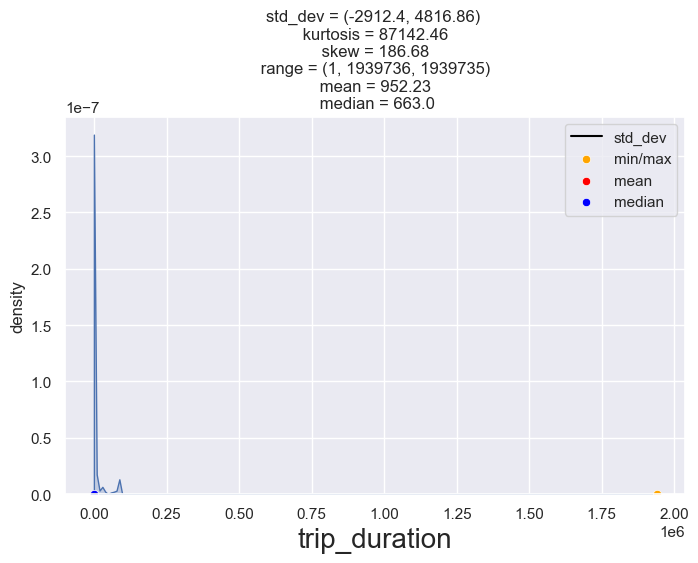

In [73]:
UVA_numeric(df, ['trip_duration'])

* From the plot it is clear that we have outliers and we need to deal with it
* Kurtosis is very high that tells us many outliers
* Skewness is very high and right skewed that tells us mnay outliers to right

In [76]:
def UVA_boxplot(df, column):
    sns.boxplot(df[column], orient='h')
    plt.title('Box plot for {} '.format(column))

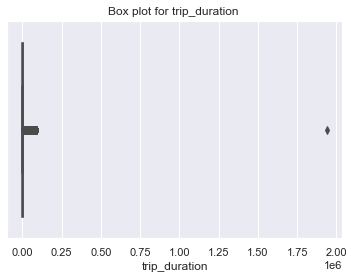

In [77]:
UVA_boxplot(df, 'trip_duration')

In [13]:
df['trip_duration'].nlargest()

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64

In [14]:
median_tp = df['trip_duration'].median()
df['trip_duration'] = np.where(df['trip_duration'] == df['trip_duration'].max(), median_tp, df['trip_duration'])

In [15]:
df['trip_duration'].nlargest()

259437    86391.0
119185    86387.0
177225    86378.0
496391    86377.0
90557     86369.0
Name: trip_duration, dtype: float64

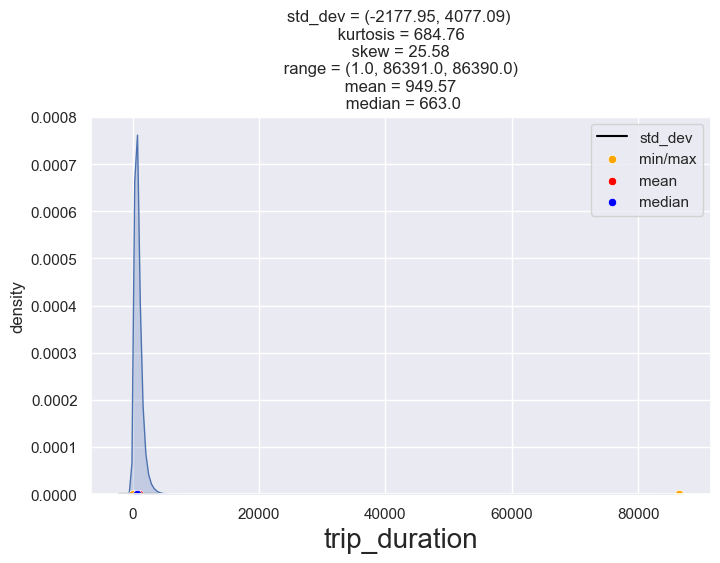

In [81]:
UVA_numeric(df, ['trip_duration'])

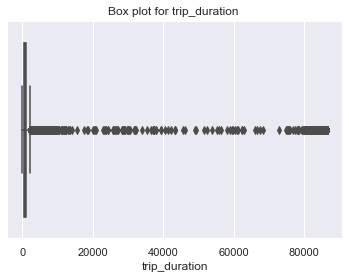

In [82]:
UVA_boxplot(df, 'trip_duration')

* Diving the trip_duration into intervals

In [16]:
bins = [0, 18000, 36000, 54000, 72000, 90000]
labels = ["<5 hrs", "5-10 hrs", "10-15 hrs","15-20 hrs",">20 hrs"]
df['duration_time'] = pd.cut(df['trip_duration'], bins, labels)

In [17]:
df['duration_time'].value_counts()

(0, 18000]        728309
(72000, 90000]       938
(18000, 36000]        36
(36000, 54000]        22
(54000, 72000]        17
Name: duration_time, dtype: int64

In [118]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,"(0, 18000]"
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,"(0, 18000]"
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,"(0, 18000]"
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,"(0, 18000]"
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,"(0, 18000]"


In [162]:
def UVA_barplot(df, column):
    plt.figure(figsize=(25,8))
    
    plt.subplot(1, 2, 1)    
    value_counts = df[column].value_counts()
    modei = df[column].mode()
    sns.barplot(value_counts.index,value_counts,order=value_counts.index)
    plt.xlabel('{}'.format(column), fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    plt.title('mode = {} /n value_counts = {} '.format(modei, value_counts))
    
    plt.subplot(1, 2, 2)
    norm_values = df[column].value_counts(normalize=True)*100
    modei = df[column].mode()
    sns.barplot(norm_values.index,norm_values,order=value_counts.index)
    plt.xlabel('{}'.format(column), fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    plt.title('mode = {} /n value_counts = {} '.format(modei, norm_values))

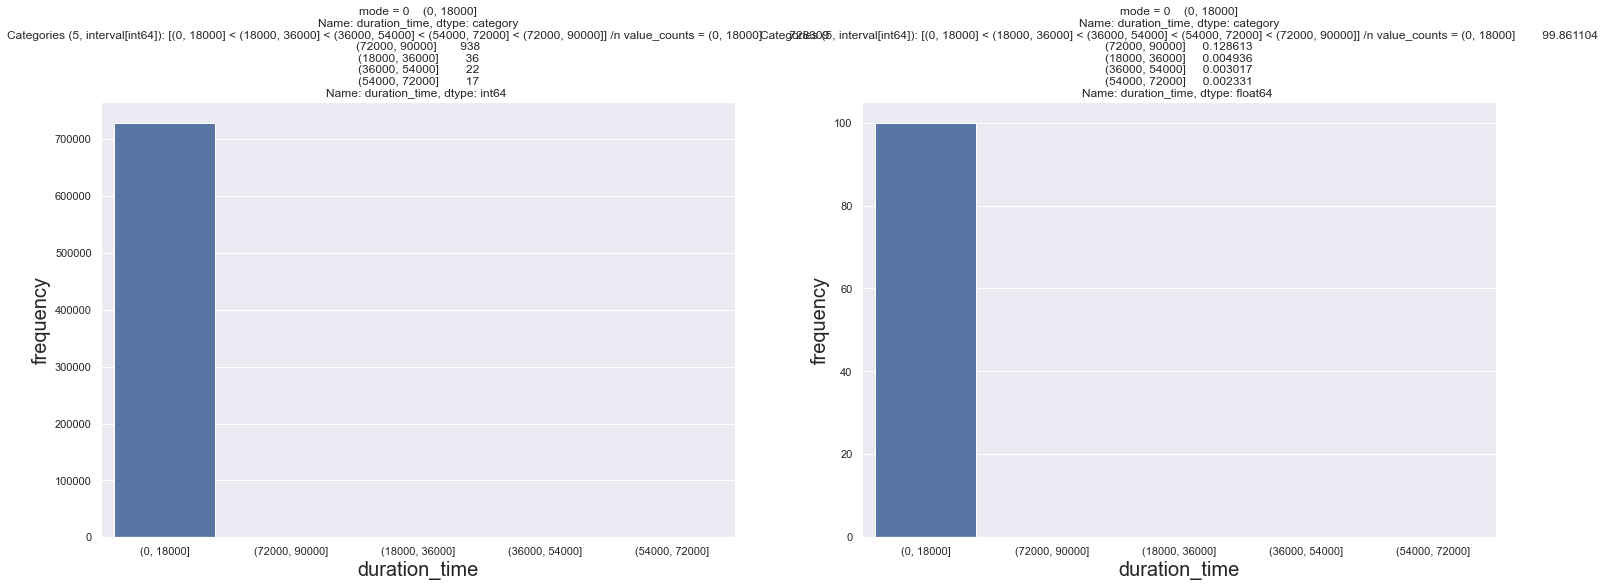

In [163]:
UVA_barplot(df, 'duration_time')

In [111]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,"(0, 18000]"
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,"(0, 18000]"
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,"(0, 18000]"
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,"(0, 18000]"
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,"(0, 18000]"


In [151]:
def UVA_bar_dist_kde(df, column):    
    plt.figure(figsize=(15,5))  
    mini = df[column].min()
    maxi = df[column].max()
    meani = df[column].mean()
    mediani = df[column].median()
    stdi = df[column].std()
    skewi = df[column].skew()
    kurtosisi = df[column].kurtosis()
    pointsi = meani-stdi, meani+stdi
    norm_values = df[column].value_counts(normalize=True)*100

    plt.subplot(1, 3, 1)
    sns.barplot(norm_values.index,norm_values,order=norm_values.index)        
    plt.xlabel('{}'.format(column), fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[column], kde=False)        
    plt.xlabel('{}'.format(column), fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    plt.title('Distribution of {}'.format(column), fontsize=20)
    plt.title('min = {} \n max = {} \n mean = {} \n median = {} \n std = {} \n skew = {} \n kurtosis = {} \n points = {} \n  value_counts = {};'.format(mini, maxi, meani, mediani, stdi, 
                                                                 skewi, kurtosisi, pointsi, norm_values))
    
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[column])        
    plt.xlabel('{}'.format(column), fontsize=20)
    plt.ylabel('frequency', fontsize=20)   

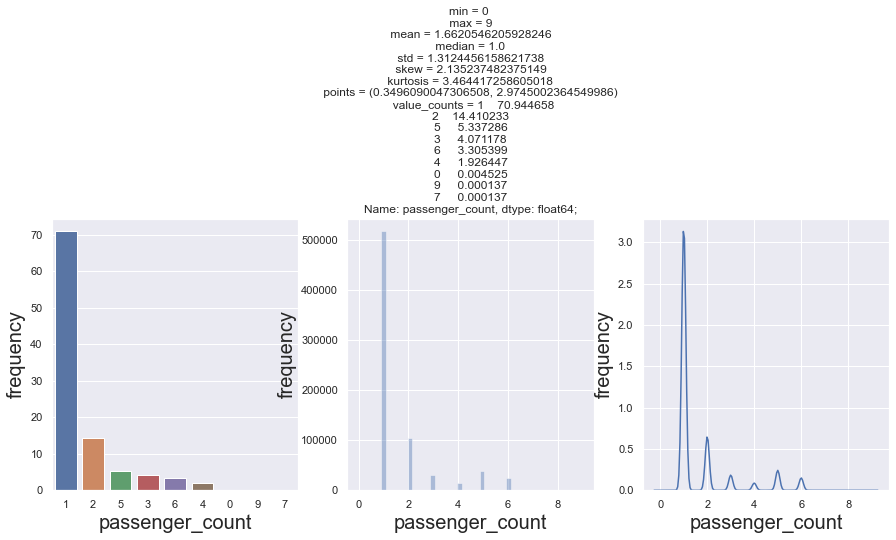

In [152]:
UVA_bar_dist_kde(df, 'passenger_count')

* For the graph it is clear that passenger count is mostly 1.

In [121]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
duration_time               category
dtype: object

# Categorical 

In [161]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

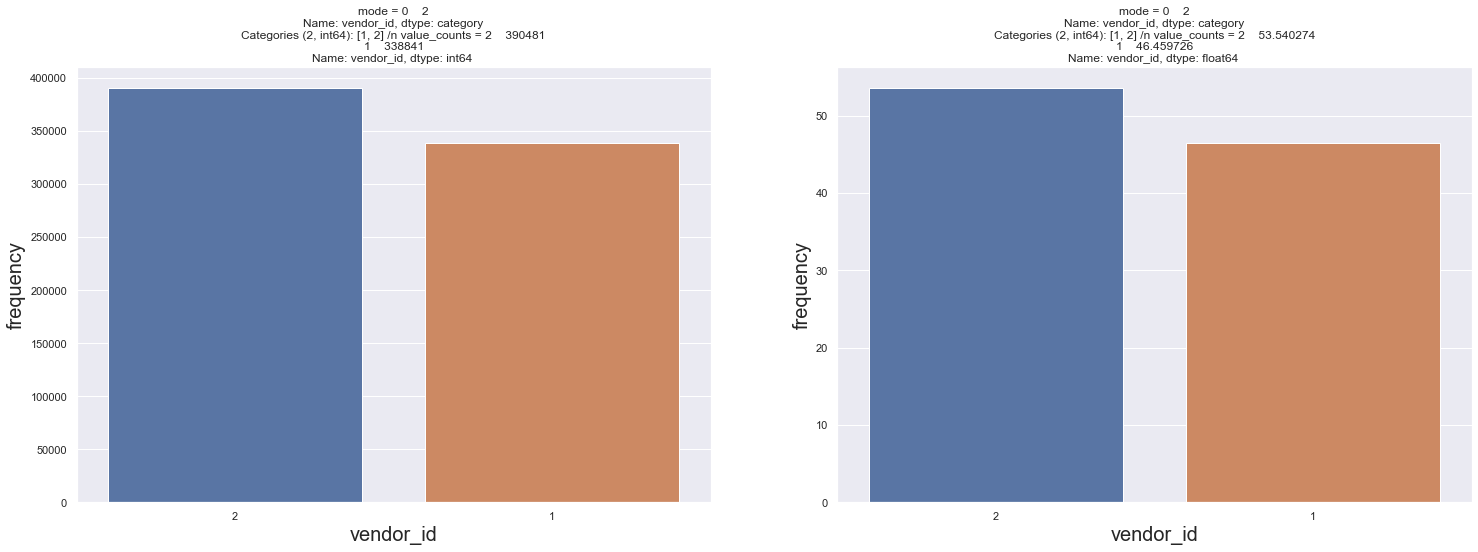

In [164]:
UVA_barplot(df, 'vendor_id')

* vendor 2 provides more trips than vendor1

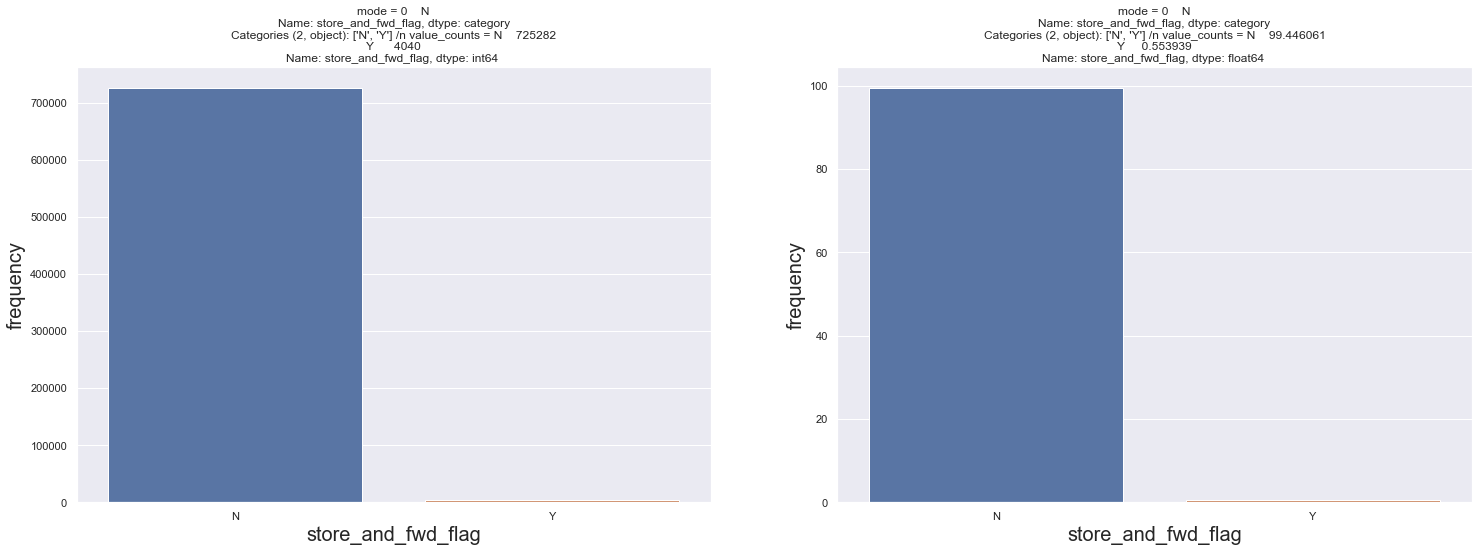

In [165]:
UVA_barplot(df, 'store_and_fwd_flag')

# Date Time Analysis

In [18]:
print(df['pickup_datetime'].nunique())
print(df['dropoff_datetime'].nunique())

709359
709308


In [19]:
df.loc[0:10, ['pickup_datetime','dropoff_datetime']]

,pickup_datetime,dropoff_datetime
0,2016-02-29 16:40:21,2016-02-29 16:47:01
1,2016-03-11 23:35:37,2016-03-11 23:53:57
2,2016-02-21 17:59:33,2016-02-21 18:26:48
3,2016-01-05 09:44:31,2016-01-05 10:03:32
4,2016-02-17 06:42:23,2016-02-17 06:56:31
5,2016-02-14 18:31:42,2016-02-14 18:55:57
6,2016-04-20 20:30:14,2016-04-20 20:36:51
7,2016-06-19 16:48:14,2016-06-19 17:06:35
8,2016-03-28 19:17:03,2016-03-28 19:48:29
9,2016-04-10 22:01:41,2016-04-10 22:25:30


In [20]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

In [21]:
df.loc[0:10, ['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day']]

,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday
5,2016-02-14 18:31:42,2016-02-14 18:55:57,Sunday,Sunday
6,2016-04-20 20:30:14,2016-04-20 20:36:51,Wednesday,Wednesday
7,2016-06-19 16:48:14,2016-06-19 17:06:35,Sunday,Sunday
8,2016-03-28 19:17:03,2016-03-28 19:48:29,Monday,Monday
9,2016-04-10 22:01:41,2016-04-10 22:25:30,Sunday,Sunday


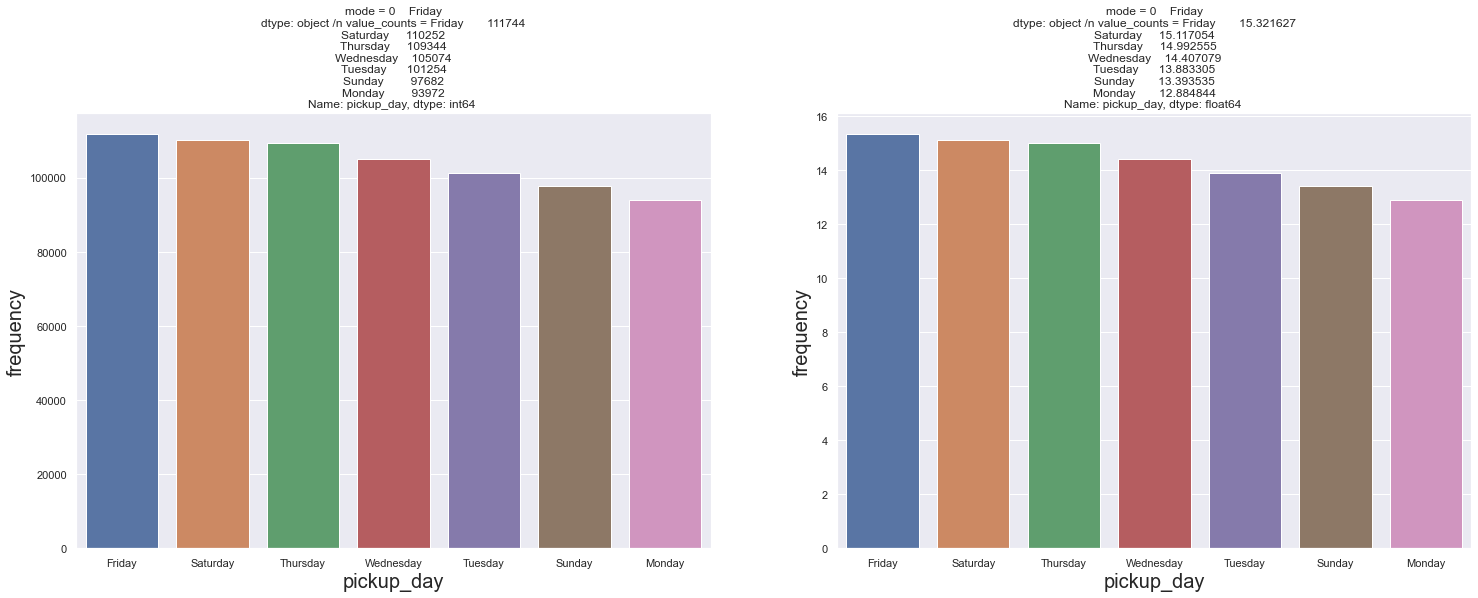

In [166]:
UVA_barplot(df, 'pickup_day')

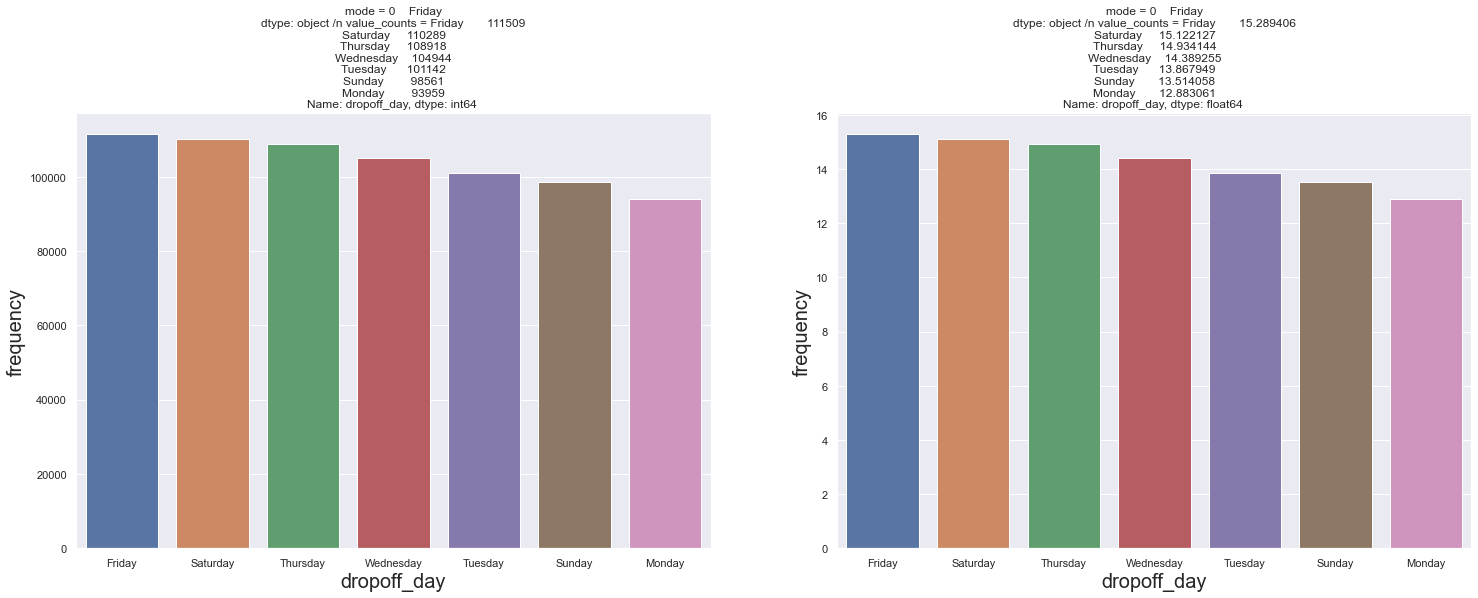

In [167]:
UVA_barplot(df, 'dropoff_day')

* Pickup's and Dropoffs are more on Friday and less on Monday. Most trips taken on Friday and less trips taken on Monday.

* Creating new column with time zones morning, afternoon, evevning, late night

In [22]:
def timezone(time):
    if time >= datetime.time(4,0,1) and time <= datetime.time(10,0,0):
        return 'morning'
    elif time >= datetime.time(10,0,1) and time <= datetime.time(16,0,0):
        return 'afternoon'
    elif time >= datetime.time(16,0,1) and time <= datetime.time(22,0,0):
        return 'evening'
    elif time >= datetime.time(22,0,1) or time <= datetime.time(4,0,0):
        return 'late night'
    
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

In [23]:
df.loc[0:10, ['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_timezone','dropoff_timezone']]

,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday,evening,evening
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday,late night,late night
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday,evening,evening
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday,morning,afternoon
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday,morning,morning
5,2016-02-14 18:31:42,2016-02-14 18:55:57,Sunday,Sunday,evening,evening
6,2016-04-20 20:30:14,2016-04-20 20:36:51,Wednesday,Wednesday,evening,evening
7,2016-06-19 16:48:14,2016-06-19 17:06:35,Sunday,Sunday,evening,evening
8,2016-03-28 19:17:03,2016-03-28 19:48:29,Monday,Monday,evening,evening
9,2016-04-10 22:01:41,2016-04-10 22:25:30,Sunday,Sunday,late night,late night


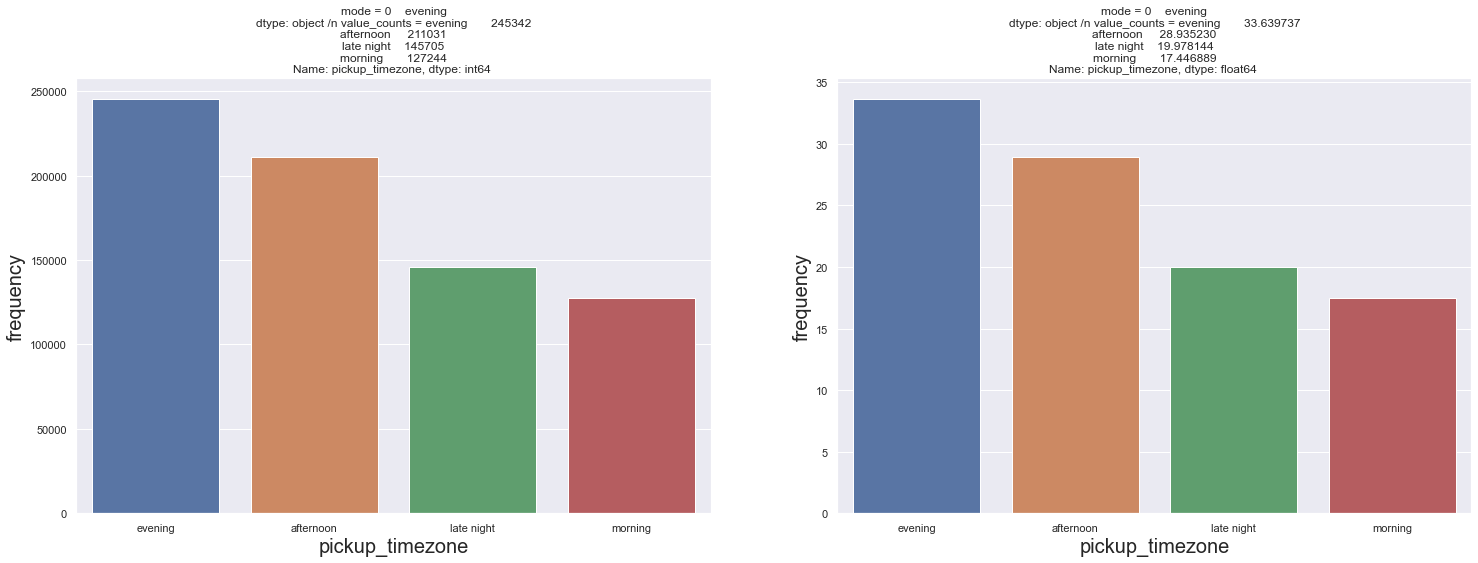

In [170]:
UVA_barplot(df, 'pickup_timezone')

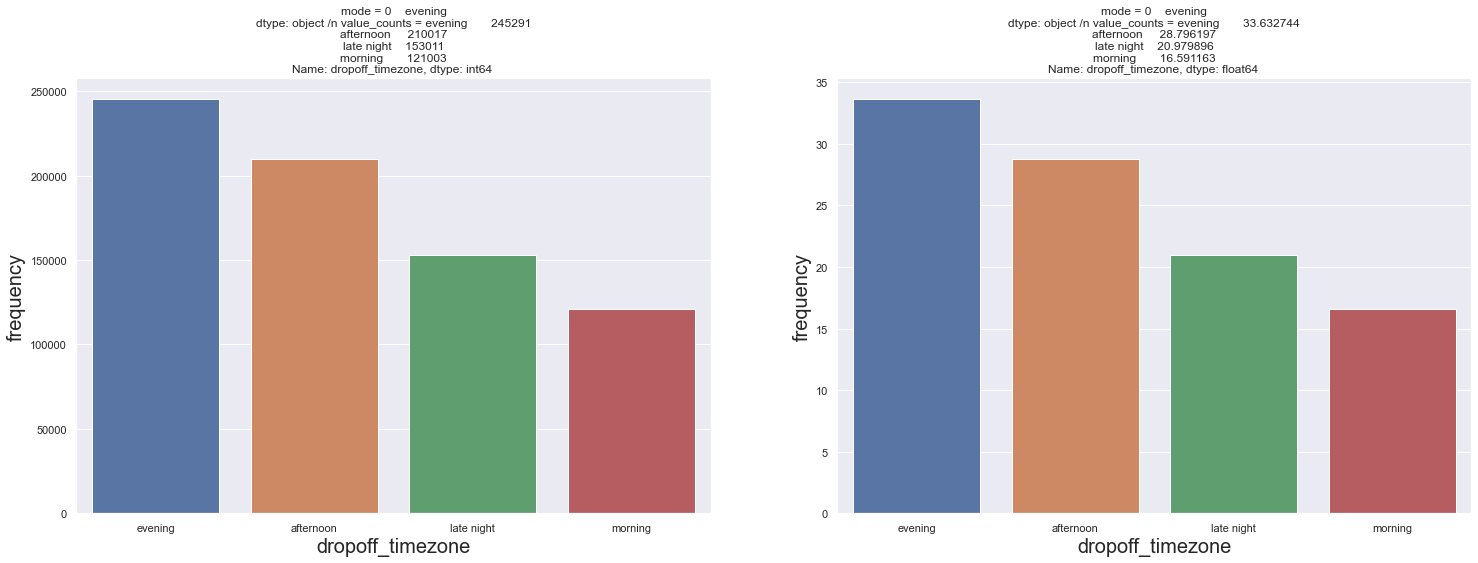

In [171]:
UVA_barplot(df, 'dropoff_timezone')

* Most pickups and drops occur in the evening and least pickups and drops occur in the morning

In [64]:
def UVA_distplot(data, column, bincount, kdeValue):
    plt.figure(figsize=(10,5))    
    
    sns.distplot(data, bins=bincount, kde=kdeValue)
    plt.xlabel('{}'.format(column), fontsize=20)
    plt.ylabel('frequency', fontsize=20)
    plt.title('Distribution of {} '.format(column))

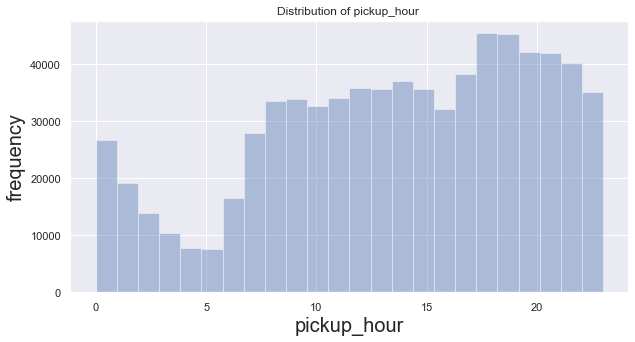

In [67]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
UVA_distplot(df['pickup_hour'],'pickup_hour',24, False)

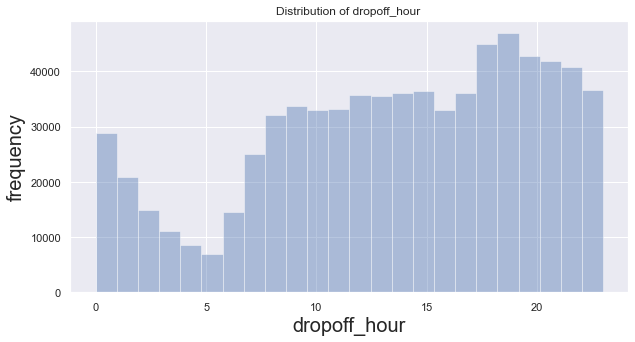

In [68]:
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
UVA_distplot(df['dropoff_hour'],'dropoff_hour',24,False)

# Latitude and Longitude

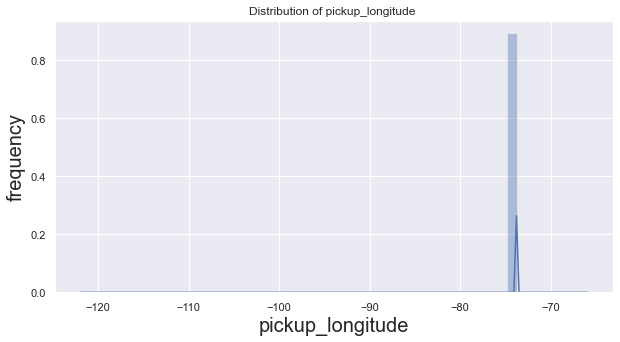

In [199]:
UVA_distplot(df['pickup_longitude'],'pickup_longitude',50,True)

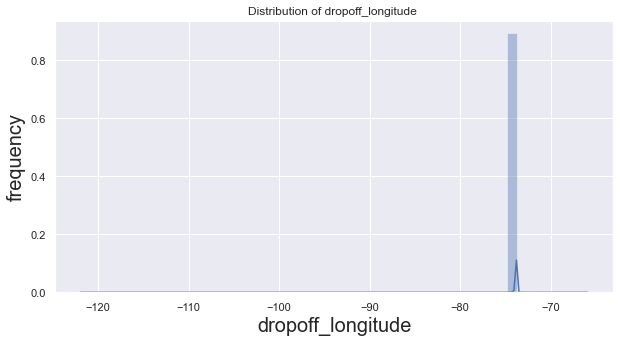

In [200]:
UVA_distplot(df['dropoff_longitude'],'dropoff_longitude',50,True)

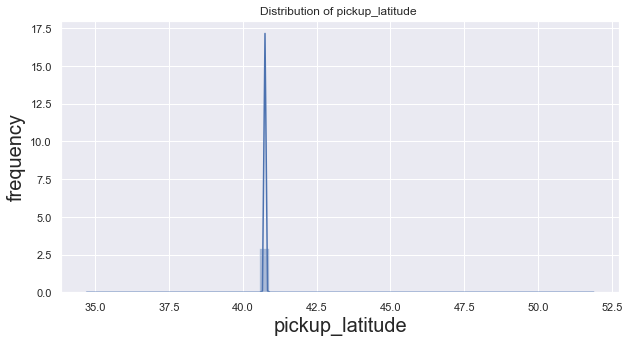

In [201]:
UVA_distplot(df['pickup_latitude'],'pickup_latitude',50,True)

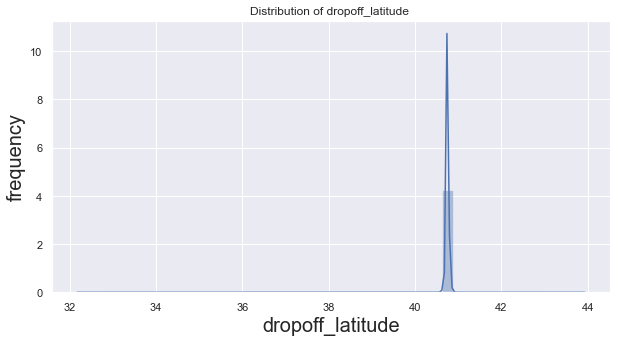

In [202]:
UVA_distplot(df['dropoff_latitude'],'dropoff_latitude',50,True)

* pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup latitude and the dropoff latitude has slightly different distribution

# Bivariate Analysis

* Trip Duration vs Day of the Week

In [203]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
duration_time               category
pickup_day                    object
dropoff_day                   object
pickup_timezone               object
dropoff_timezone              object
dtype: object

In [217]:
df[['passenger_count', 'trip_duration']].corr()

,passenger_count,trip_duration
passenger_count,1.00000,0.01652
trip_duration,0.01652,1.00000


In [33]:
def BVA_heatmap(columns):
    plt.figure(figsize=(36,6))
    for j,i in enumerate(['pearson','spearman','kendall']):
        plt.subplot(1,3,j+1)
        correlation = df[columns].corr(method=i)
        sns.heatmap(correlation, linewidths=2)
        plt.title(i, fontsize=18)    

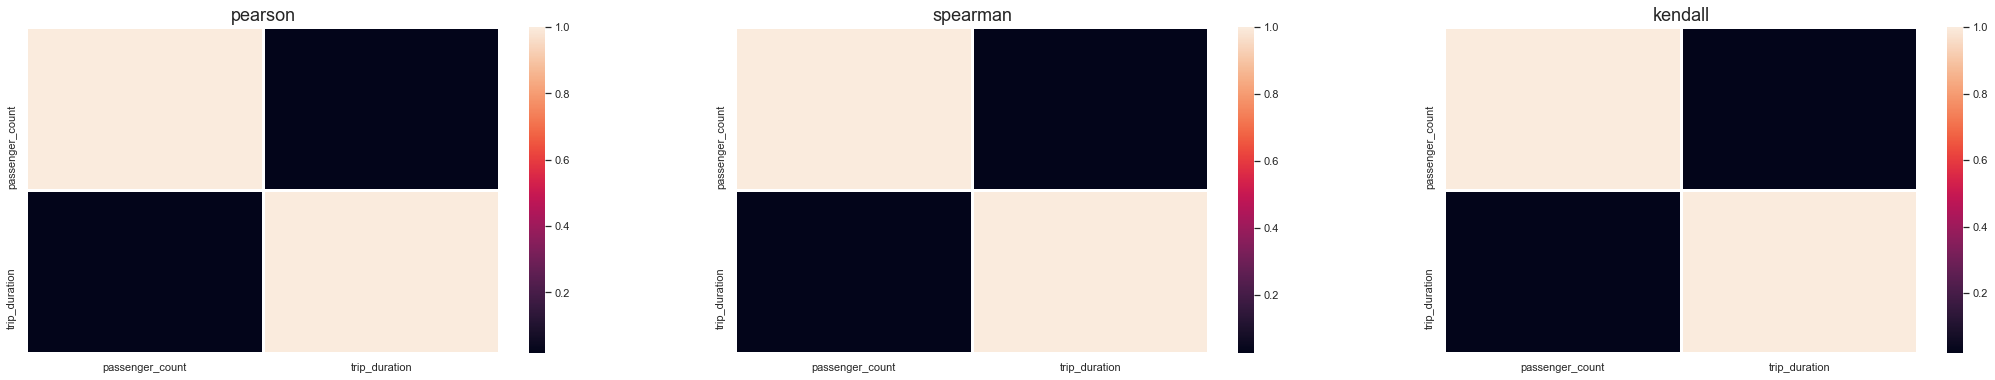

In [34]:
numerical = ['passenger_count', 'trip_duration']
BVA_heatmap(numerical)

<Figure size 840x560 with 0 Axes>

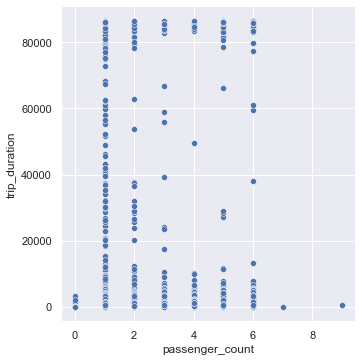

In [37]:
plt.figure(dpi=140)
sns.relplot(x='passenger_count', y='trip_duration', data=df, kind='scatter')

<Figure size 840x560 with 0 Axes>

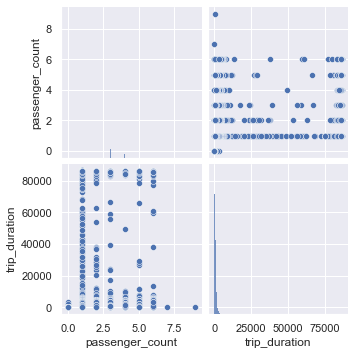

In [220]:
plt.figure(dpi=140)
sns.pairplot(df[numerical])

* There is correlation between Trip Duration and Passenger Count

* Trip Duration vs Vendor Id

In [245]:
df.shape

(729322, 16)

In [225]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
duration_time               category
pickup_day                    object
dropoff_day                   object
pickup_timezone               object
dropoff_timezone              object
dtype: object

In [28]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

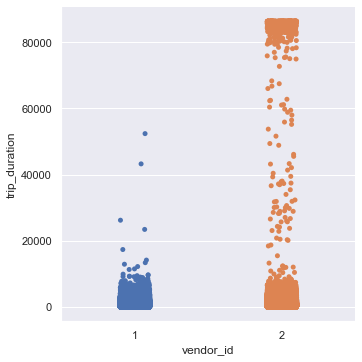

In [27]:
sns.catplot(x='vendor_id', y='trip_duration', kind='strip', data= df.loc[0:729322,['vendor_id','trip_duration']])

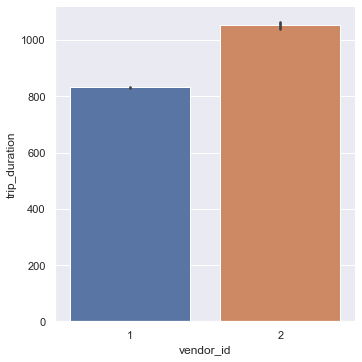

In [45]:
sns.catplot(x='vendor_id', y='trip_duration', kind='bar', data= df.loc[0:729322,['vendor_id','trip_duration']])

* For the plot it is clear that vendor 1 provides shorter trips where vendor 2 provides shorter and longer trips as well

* Trip Duration vs store_and_fwd_flag

<Figure size 720x360 with 0 Axes>

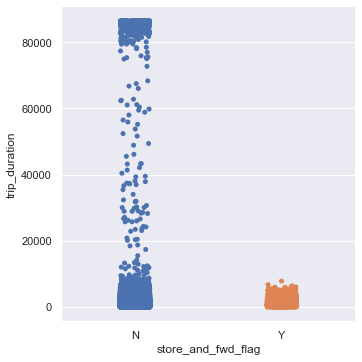

In [43]:
plt.figure(figsize=(10,5))
sns.catplot(x=df['store_and_fwd_flag'],y=df['trip_duration'],kind='strip', data= df.loc[0:729322,['store_and_fwd_flag','trip_duration']])

* Flag was stored only for shorter duration trips and for longer duration trips it was never stored

* Trip Duration vs Pickup Day

<Figure size 1080x576 with 0 Axes>

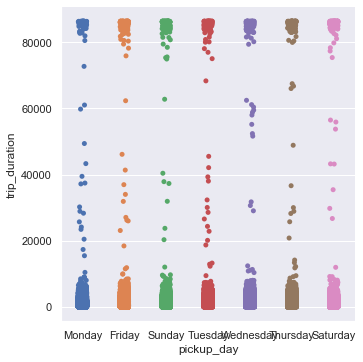

In [39]:
plt.figure(figsize=(15,8))
sns.catplot(x='pickup_day', y='trip_duration',kind='strip', data=df)

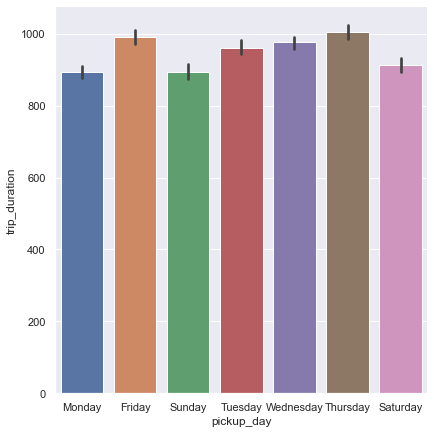

In [40]:
sns.catplot(x='pickup_day', y='trip_duration', kind='bar', data=df, height=6, aspect=1)

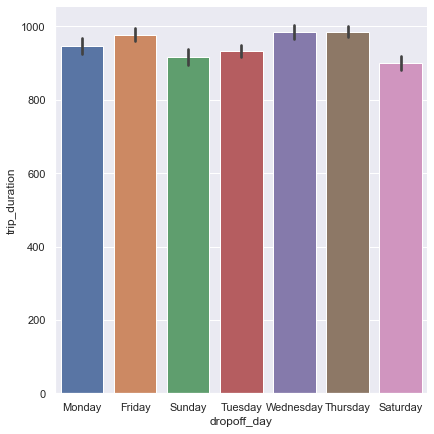

In [49]:
sns.catplot(x='dropoff_day', y='trip_duration', kind='bar', data=df, height=6, aspect=1)

* From the plot it is clear that avg time taken to complete a trip is highest on Wednesday & Thursday and lowest on Tuesday & Wednesday

* Trip Duration vs Time of the Day

In [69]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_time,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,"(0, 18000]",Monday,Monday,evening,evening,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,"(0, 18000]",Friday,Friday,late night,late night,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,"(0, 18000]",Sunday,Sunday,evening,evening,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,"(0, 18000]",Tuesday,Tuesday,morning,afternoon,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,"(0, 18000]",Wednesday,Wednesday,morning,morning,6,6


<Figure size 576x360 with 0 Axes>

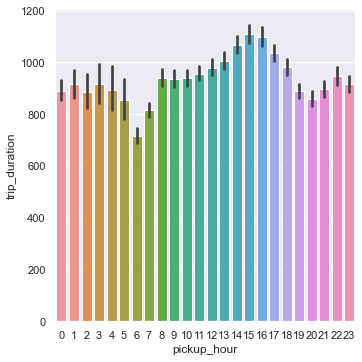

In [79]:
plt.figure(figsize=(8,5))
sns.catplot(x='pickup_hour', y='trip_duration', kind='bar', data=df)

<Figure size 576x360 with 0 Axes>

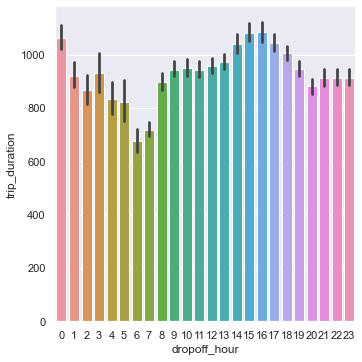

In [80]:
plt.figure(figsize=(8,5))
sns.catplot(x='dropoff_hour', y='trip_duration', kind='bar', data=df)

* From the plot it is clear that higest mean trip duration is for trips started between 14 and 17 hours

* Trip Duration vs Geographical Location

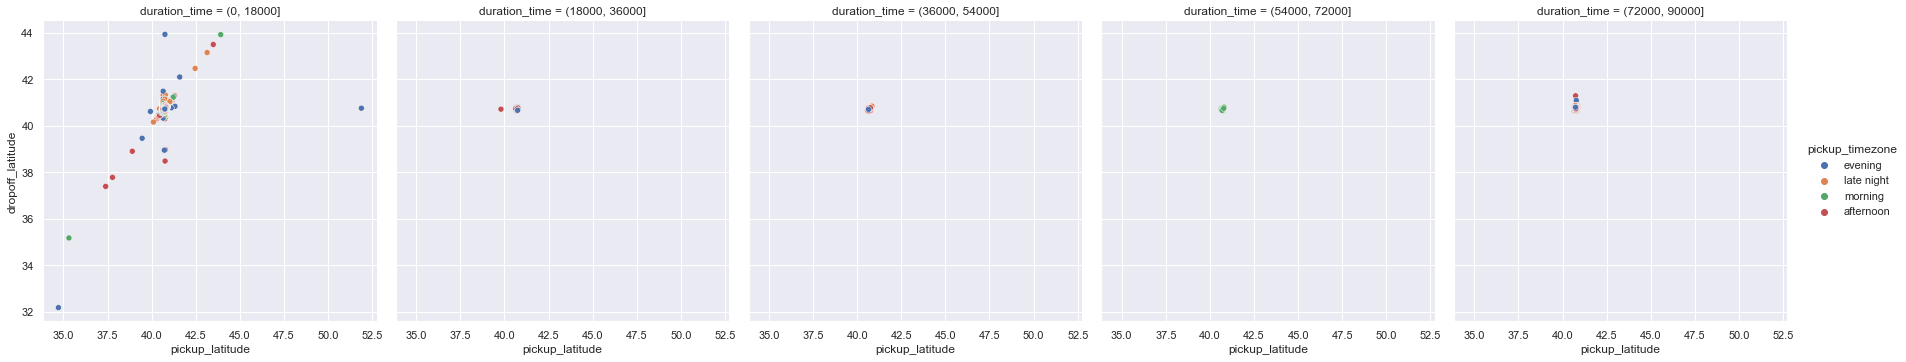

In [81]:
sns.relplot(x='pickup_latitude',y='dropoff_latitude',hue='pickup_timezone',col='duration_time',data=df)

* For shorter trips, the pickup and dropoff latitude is evenly distributed between 35 to 44
* For longer trips, the pickup and dropoff latitude is concentratd between 40 to 42

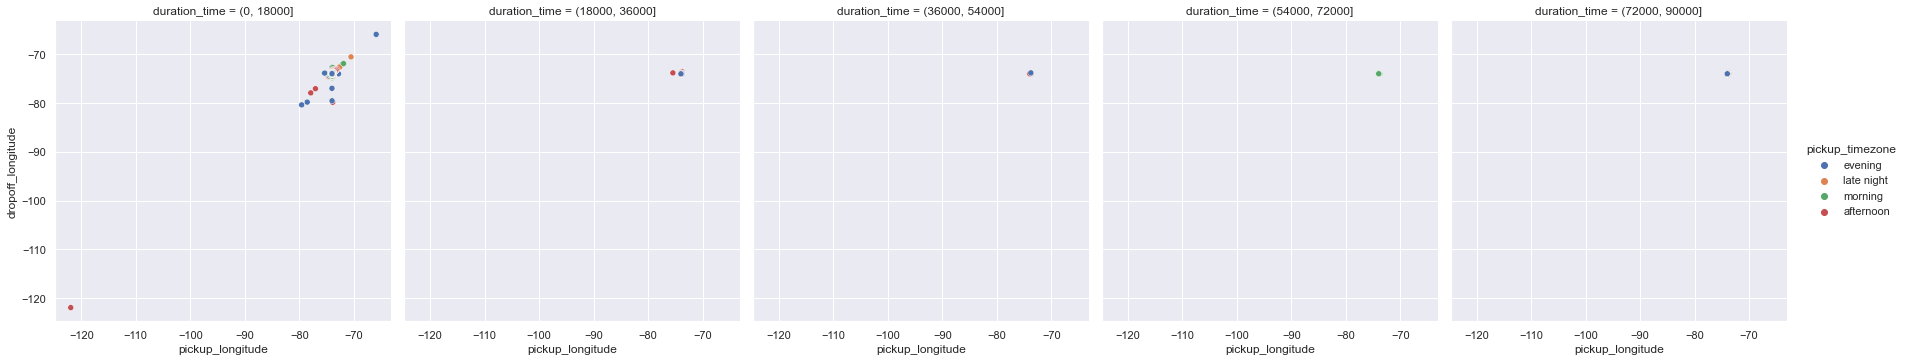

In [82]:
sns.relplot(x='pickup_longitude',y='dropoff_longitude',hue='pickup_timezone',col='duration_time',data=df)

* For shorter trips, the pickup and dropoff latitude is evenly distributed between -80 to -70
* For longer trips, the pickup and dropoff latitude is concentratd at -75

# Multi Variate Analysis

In [83]:
from pandas.plotting import parallel_coordinates

In [84]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_time,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,"(0, 18000]",Monday,Monday,evening,evening,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,"(0, 18000]",Friday,Friday,late night,late night,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,"(0, 18000]",Sunday,Sunday,evening,evening,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,"(0, 18000]",Tuesday,Tuesday,morning,afternoon,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,"(0, 18000]",Wednesday,Wednesday,morning,morning,6,6


In [90]:
df.pivot_table('trip_duration', ['pickup_day', 'pickup_timezone'], aggfunc='mean')

trip_duration
pickup_day pickup_timezone               
Friday     afternoon          1087.880354
           evening             987.973186
           late night          959.029934
           morning             887.298699
Monday     afternoon           964.009663
           evening             876.013780
           late night          820.101652
           morning             871.669762
Saturday   afternoon           876.753475
           evening             942.547039
           late night          971.420874
           morning             788.491155
Sunday     afternoon           887.995552
           evening             941.330340
           late night          899.679688
           morning             772.120102
Thursday   afternoon          1114.248566
           evening            1010.909780
           late night          908.784511
           morning             925.932450
Tuesday    afternoon          1060.419774
           evening             943.286666
           late night          909.894149
           morning             889.097985
Wednesday  afternoon          1093.444353
           evening             961.543377
           late night          882.018792
           morning             907.381379

* From pivot table it is clear that Mornings have less average trip Duration on all days. Mean for Trip duration is high on Evenings of Thursdays and Fridays.

# Conclusion

* Trip duration varies from few seconds to more than 20 hours
* Mostly passenger count is 1
* Vendor 2 mostly provided the longer trips
* Pickup's and Dropoffs are more on Friday and less on Monday. Most trips taken on Friday and less     trips taken on Monday.
* Most pickups and drops occur in the evening and least pickups and drops occur in the morning
* No Relationship between Passenger Count and Trip Duration* 
* Store_and_fwd flag stored for shorter trips only
* It is clear that higest mean trip duration is for trips started between 14 and 17 hours
* It is clear that avg time taken to complete a trip is highest on Wednesday & Thursday and lowest on Tuesday & Wednesday
* For longer trips, the pickup regions is concentratd near (40,75) and (42,75)